# SMS Spam Detection System 

In [1]:
# Libraries
import pandas as pd

# split and train

from sklearn.model_selection import train_test_split


# Machine Learning

from sklearn.ensemble import RandomForestClassifier

# accuracy
from sklearn.metrics import accuracy_score

# data preprocessing

import nltk

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

# convert word to int value
from sklearn.feature_extraction.text import CountVectorizer

# graph

import seaborn as sns 

## Import Data

In [2]:
pam = pd.read_csv("spam.csv", encoding='ISO-8859-1')
pam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# drop last 3 columns

pam.drop(pam.columns[[2,3,4]],axis = 1, inplace = True )

pam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Rename columns
pam.columns = ['label', 'message']

In [5]:
## Check Data Type and missing values
pam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: xlabel='label', ylabel='count'>

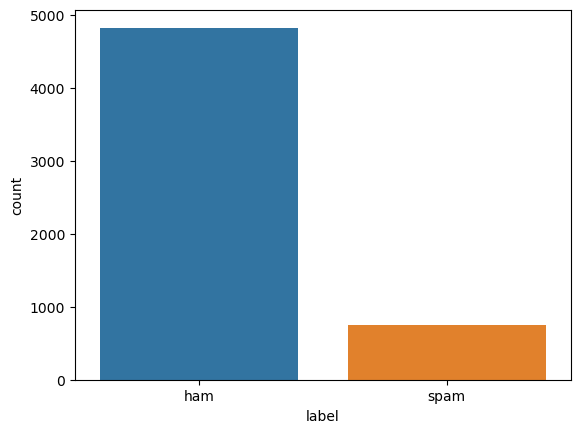

In [6]:
sns.countplot(x='label', data=pam)

## Data split and prep

In [7]:
# convert v1 to numerical 

pam['label'] = pam['label'].replace({'ham': 1 , 'spam': 0})

pam.head()

,label,message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# convert to lowercase, rmeove numbers,punctuation , white space and hyperlinks 

import re
def preprocess(text):
    # Convert to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

pam['message'] = pam['message'].apply(preprocess)
pam

,label,message
0,1,go until jurong point crazy available only in ...
1,1,ok lar joking wif u oni
2,0,free entry in a wkly comp to win fa cup final ...
3,1,u dun say so early hor u c already then say
4,1,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,0,this is the nd time we have tried contact u u ...
5568,1,will ì_ b going to esplanade fr home
5569,1,pity was in mood for that soany other suggestions
5570,1,the guy did some bitching but i acted like id ...


In [9]:
X = pam['message']

y = pam['label']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [11]:
vectorizer = CountVectorizer()

In [12]:
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## Random Forest  ML

In [13]:
rnd = RandomForestClassifier()

In [14]:
rnd.fit(X_train_vec, y_train)

RandomForestClassifier()

In [15]:
accuracy = rnd.score(X_test_vec, y_test)

In [16]:
accuracy

0.9691313711414213